In [1]:
# Imports and path definitions

import sys
import os
import plotly.plotly as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from itertools import combinations

path = os.getcwd() + '/'

# NEW APPROACH

** Pre analysis -- hiperfino = 0 -- control soble niveles
~ Parallel and isotrope hyperfine
Polinomios de intervalos  5/3 puntos de H

1. Run your simpre calculation and plot your results.
2. Define a trainning data set region without non-avoided crossings
    - Minimum of 3-5 points (plot your results)
3. Run Poly.py 
4. Run expected_values.py
5. Run main.py

n. of points: 503


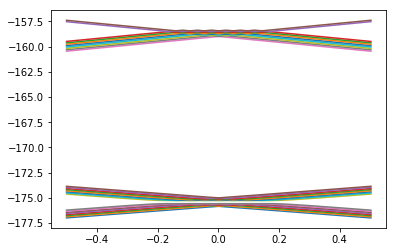

In [49]:
ene_f = path + "simpre.ene"

ene = np.loadtxt(ene_f, dtype= float)

#plt.plot(ene[:,0], ene[:,[1,2,3,4, 5, 6, 7,8, 9,10, 11, 12, 13, 14, 15, 16]])
plt.plot(ene[:,0], ene[:,1:])
#plt.savefig('plot_ene.png', dpi = 300)

print 'n. of points: ' + str(len(ene))
plt.show()


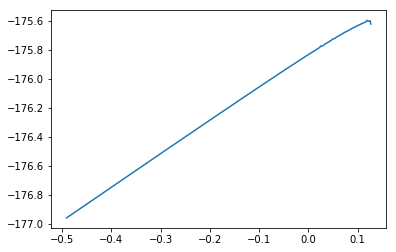

                 lvl_1 lvl_2 lvl_3 lvl_4 lvl_5 lvl_6 lvl_7 lvl_8 lvl_9 lvl_10  \
-0.50101           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.49901           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.49701           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.49501           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.49301           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.49101  -176.9575400   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.48901  -176.9528966   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.48701  -176.9482534   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.48501  -176.9436103   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.48301  -176.9389674   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.48101  -176.9343246   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
-0.47901  -176.9296820   NaN

In [65]:
# Evaluate expected values

#plt.plot(expected_df.index, expected_df.iloc[:,1:])
plt.plot(expected_df.index, expected_df.iloc[:,[0,1,]])
#plt.savefig('plot_prev.png', dpi = 300)

#print 'n. of points: ' + str(len(ene_prev))
plt.show()
print expected_df

In [78]:
#print e
#print expected_df.iloc[247, 8]
#print ene_df.iloc[247, 8]

-175.1607809
-175.1607809


In [51]:
#
## Functions module
#

def poly(five_H, five_E): #dataset with set of points: would retrieve 
    #print five_E
    #print five_H
    x = five_H # set campos H (5)
    y = five_E # set valores E (5)
        
    vec_z = np.polyfit(x, y, deg = 2)
    return vec_z
    
    #poli_out = open(path + 'poli.out', 'w')
    #poli_out.write('name\tk0\tk1\tk2\n')
    #poli_out.write(i + '\t' + str(k0) + '\t' + str(k1) + '\t' + str(k2))
    #poli_out.write('\n')
    #poli_out.close()


def expected_E(vec_z, H_v):
    k0 = vec_z[2]
    k1 = vec_z[1]
    k2 = vec_z[0]
    predicted_E = (k2 * (float(H_v)**2)) + (k1 * float(H_v)) + k0
    return predicted_E
    #expec_out.write(str(v) + '\t')


def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

In [52]:
#
## Initial definitions
#

# Defined by the user so far; automatize for the future
J = float(8)
I = float(7.5)
g_par = 0.0000
g_per = 0.0000

# Lists
tot_lvls = int((2*J + 1)*(2*I + 1))
m_j = list(range(int(-(2*J)), int((2*J+2)), int(2)))
m_i = list(range(int(-(2*I)), int((2*I+2)), int(2)))

lvls_list = []
for i in list(range(np.size(ene, axis=1)-1)):
    lvls_list.append('lvl_'+ str(i+1))

## Generate projections list from m_j and m_i
projections_l = []
for j in m_j:
    for i in m_i:
        proj = str(j) + '/' + str(i)
        projections_l.append(proj)

#print projections_l
#print lvls_list
#print tot_lvls


In [53]:
#
##
### Loading datasets
##
#

# Loads polynomios file
#with open(path + 'poli.out', 'r') as poli_f:
#    poli_df = pd.read_csv(poli_f, sep='\t', header=0, index_col=0)#, dtype=float)


# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)
order_df = pd.DataFrame(index=H_values, columns=lvls_list)

# Fill first 5 positions of order_df
c = 0
for i in lvls_list:
    c=0
    for i2 in H_values:
        c+=1
        if c < 6 :
            order_df.loc[i2, i] = i.replace('lvl_' , '')

            
#print order_df.iloc[6,1]
#print ene_df.iloc[6,1]
#print expected_df.iloc[:,1]


In [64]:
#
##
### Loading datasets
##
#

# Loads polynomios file
#with open(path + 'poli.out', 'r') as poli_f:
#    poli_df = pd.read_csv(poli_f, sep='\t', header=0, index_col=0)#, dtype=float)


test_list = []

# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)
order_df = pd.DataFrame(index=H_values, columns=lvls_list)

# Fill first 5 positions of order_df
c = 0
for i in lvls_list:
    c=0
    for i2 in H_values:
        c+=1
        if c < 6 :
            order_df.loc[i2, i] = i.replace('lvl_' , '')


            
            
# Open out files
expec_out = open('expected_values.out', 'w')
poli_out = open('poli.out', 'w')

#
##
### Main loop
##
#

#print order_df

n = 0
col = 0
row = 0
for i0 in lvls_list:

    c0 = 0
    c1=0
    
    n+= 1
    
    five_H = []
    five_E = []
    d_poli = {}
    
    poli_out.write(i0 + '\n' )
    
    
    for i1 in H_values:
        print i1
        c0 += 1
        c1 += 1     
        
        # Rellenar listas
        five_H.append(i1)
        
        pos = float(order_df.loc[i1, i0])
        col = int(pos)-1
        row = int(c1)-1
        five_E.append(ene_df.iloc[row, col])
        
        
        #if math.isnan(pos):
        #    print 'isnull'
        #    five_E.append(float(expected_v))
        #    print five_E
        
        #else:
            
        #    col = int(pos)-1
        #    row = int(c1)-1
        #    print col
        #    print row
        #    five_E.append(ene_df.iloc[row, col])
        
        #print five_E
        #print five_H
        
        
        if len(five_H) ==5:
            
            # Fitting
            vec_poly = poly(five_H, five_E)
            p = np.poly1d(vec_poly)
            d_poli[i1] = p
            poli_out.write('H: ' + str(H_values[c1-1]) + ' ' + str(p) +'\n') #+ ' ' + five_H + ' ' + five_E + '\n')
            
            
            if c1 == len(H_values):
                continue
            
            else:
                
                H_next = float(H_values[c1])
                #print H_next
                #H_v = '%.8f' % H_next
                #H_v = truncate(H_next, 5)

                
                # Calculate expected_v for the next H value
                expected_v = float(expected_E(vec_poly, H_next))
                v0 = '%.7f' % expected_v
                v2 = '%.6f' % expected_v
                v3 = '%.5f' % expected_v
                v4 = '%.4f' % expected_v
                v5 = '%.3f' % expected_v
                v1 = truncate(v0, 6)
                v2 = truncate(v2, 5)
                v3 = truncate(v3, 4)
                v4 = truncate(v4, 3)
                v5 = truncate(v5, 2)

                expected_df.loc[H_next, i0] = v0


                # Search expected values in ene_df
                ene_1 = float(ene_df.loc[H_next, i0])
                e0 = '%.7f' % ene_1
                e1 = truncate(e0, 6)
                e2 = truncate(e0, 5)
                e3 = truncate(e0, 4)
                e4 = truncate(e0, 3)


                if v1 == e1:
                    order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                    print 'valor exacto'
                    

                else:
                    if v2 == e2:
                        order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                        print 'valor exacto-2'
                
                    else:
                        if v3 == e3:
                            order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                            print 'valor exacto-3'
                
                        else:
                            if v4 == e4:
                                order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                                print 'valor exacto-4'

                            else: ### time to re-order!!
                                print 'no match'

                                print v1
                                print e1
                                print ene_df.loc[H_next]

                                c4 = 0

                                for i3 in lvls_list:
                                    c4 += 1

                                    e_value = ene_df.loc[H_next, i3]
                                    e1_2 = '%.7f' % e_value
                                    e2_2 = '%.6f' % e_value
                                    e3_2 = '%.5f' % e_value
                                    e4_2 = '%.4f' % e_value
                                    e5_2 = '%.3f' % e_value

                                    e6_2 = '%.3f' % (float(e_value) + float(0.01))
                                    e7_2 = '%.3f' % (float(e_value) - float(0.01))

                                    e8_2 = '%.3f' % (float(e_value) + float(0.02))
                                    e9_2 = '%.3f' % (float(e_value) - float(0.02))

                                    e10_2 = '%.3f' % (float(e_value) + float(0.1))
                                    e11_2 = '%.3f' % (float(e_value) - float(0.1))


                                    e1_2 = truncate(e1_2, 6)
                                    e2_2 = truncate(e2_2, 5)
                                    e3_2 = truncate(e3_2, 4)
                                    e4_2 = truncate(e4_2, 3)
                                    e5_2 = truncate(e5_2, 2)
                                    e6_2 = truncate(e6_2, 2)
                                    e7_2 = truncate(e7_2, 2)
                                    e8_2 = truncate(e8_2, 2)
                                    e9_2 = truncate(e9_2, 2)
                                    e10_2 = truncate(e10_2, 2)
                                    e11_2 = truncate(e11_2, 2)


                                    if v1 == e1_2:
                                        order_df.loc[H_next, i0] = c4
                                        print 'yes 1'
                                        

                                    else:
                                        if v2 == e2_2:
                                            order_df.loc[H_next, i0] = c4
                                            print c4
                                            print 'yes 2'
                                            

                                        else:
                                            if v3 == e3_2:
                                                order_df.loc[H_next, i0] = c4
                                                print c4
                                                print 'yes 3'
                                                

                                            else:
                                                if v4 == e4_2:
                                                    order_df.loc[H_next, i0] = c4
                                                    print c4
                                                    print 'yes 4'
                                                    

                                                else:
                                                    if v5 == e5_2:
                                                        order_df.loc[H_next, i0] = c4
                                                        print c4
                                                        print 'yes 5'
                                                        

                                                    else:
                                                        if v5 == e6_2:
                                                            order_df.loc[H_next, i0] = c4
                                                        else:
                                                            continue


                c0 = c0-1
                five_E.pop(0)
                five_H.pop(0)
    
    poli_out.write('\n')
#print expected_df

order_df.to_csv(path + 'order.txt', header = lvls_list, sep=' ', na_rep='na')
expected_df.to_csv(path + 'expected.txt', header = lvls_list, sep=' ', na_rep='na')
    
## Condition 1 : compare pends (k1)
   
## Condition 2 : compare second derivative (k2)
    
## Condition 3 : allowed/non-allowed transitions (+/- 1) 
expec_out.close()
poli_out.close()

-0.50101
-0.49901
-0.49701
-0.49501
-0.49301
valor exacto
-0.49101
valor exacto
-0.48901
valor exacto
-0.48701
valor exacto
-0.48501
valor exacto
-0.48301
valor exacto
-0.48101
valor exacto-2
-0.47901
valor exacto
-0.47701
valor exacto
-0.47501
valor exacto
-0.47301
valor exacto
-0.47101
valor exacto
-0.46901
valor exacto
-0.46701
valor exacto
-0.46501
valor exacto
-0.46301
valor exacto
-0.46101
valor exacto
-0.45901
valor exacto
-0.45701
valor exacto-2
-0.45501
valor exacto
-0.45301
valor exacto
-0.45101
valor exacto
-0.44901
valor exacto
-0.44701
valor exacto
-0.44501
valor exacto
-0.44301
valor exacto
-0.44101
valor exacto
-0.43901
valor exacto
-0.43701
valor exacto
-0.43501
valor exacto
-0.43301
valor exacto
-0.43101
valor exacto
-0.42901
valor exacto
-0.42701
valor exacto
-0.42501
valor exacto
-0.42301
valor exacto
-0.42101
valor exacto
-0.41901
valor exacto
-0.41701
valor exacto
-0.41501
valor exacto
-0.41301
valor exacto
-0.41101
valor exacto
-0.40901
valor exacto-2
-0.40701
val

0.03899
no match
-175.746305
-175.923563
lvl_1    -175.923563
lvl_2    -175.819372
lvl_3    -175.746307
lvl_4    -175.719865
lvl_5    -175.653854
lvl_6    -175.631650
lvl_7    -175.585139
lvl_8    -175.574896
lvl_9    -175.258390
lvl_10   -175.248147
lvl_11   -175.201636
lvl_12   -175.179432
lvl_13   -175.113421
lvl_14   -175.086979
lvl_15   -175.013914
lvl_16   -174.909723
lvl_17   -159.108405
lvl_18   -158.969962
lvl_19   -158.869296
lvl_20   -158.831519
lvl_21   -158.730854
lvl_22   -158.693077
lvl_23   -158.592411
lvl_24   -158.554634
lvl_25   -158.453969
lvl_26   -158.416192
Name: 0.04099, dtype: float64
3
yes 2
0.04099
no match
-175.742179
-175.928014
lvl_1    -175.928014
lvl_2    -175.823692
lvl_3    -175.742181
lvl_4    -175.723903
lvl_5    -175.650308
lvl_6    -175.634953
lvl_7    -175.583240
lvl_8    -175.576147
lvl_9    -175.257139
lvl_10   -175.250045
lvl_11   -175.198333
lvl_12   -175.182978
lvl_13   -175.109383
lvl_14   -175.091105
lvl_15   -175.009594
lvl_16   -174.90527

Name: 0.07099, dtype: float64
4
yes 2
5
yes 5
0.07099
no match
-175.680998
-175.995182
lvl_1    -175.995183
lvl_2    -175.889287
lvl_3    -175.786247
lvl_4    -175.689322
lvl_5    -175.682446
lvl_6    -175.608036
lvl_7    -175.603137
lvl_8    -175.569745
lvl_9    -175.263541
lvl_10   -175.230149
lvl_11   -175.225250
lvl_12   -175.150840
lvl_13   -175.143964
lvl_14   -175.047039
lvl_15   -174.944000
lvl_16   -174.838104
lvl_17   -159.201738
lvl_18   -159.063296
lvl_19   -158.924853
lvl_20   -158.786410
lvl_21   -158.775963
lvl_22   -158.647967
lvl_23   -158.637520
lvl_24   -158.509525
lvl_25   -158.499078
lvl_26   -158.371082
Name: 0.07299, dtype: float64
4
yes 5
5
yes 5
0.07299
no match
-175.678641
-175.999684
lvl_1    -175.999684
lvl_2    -175.893704
lvl_3    -175.790500
lvl_4    -175.693196
lvl_5    -175.678645
lvl_6    -175.610874
lvl_7    -175.600511
lvl_8    -175.569943
lvl_9    -175.263343
lvl_10   -175.232775
lvl_11   -175.222412
lvl_12   -175.154641
lvl_13   -175.140090
lvl_14 

6
yes 3
0.09899
no match
-175.632330
-176.058419
lvl_1    -176.058419
lvl_2    -175.951516
lvl_3    -175.846566
lvl_4    -175.745443
lvl_5    -175.653109
lvl_6    -175.632337
lvl_7    -175.584733
lvl_8    -175.575147
lvl_9    -175.258139
lvl_10   -175.248553
lvl_11   -175.200949
lvl_12   -175.180177
lvl_13   -175.087843
lvl_14   -174.986720
lvl_15   -174.881770
lvl_16   -174.774868
lvl_17   -159.283405
lvl_18   -159.144962
lvl_19   -159.006519
lvl_20   -158.868077
lvl_21   -158.729634
lvl_22   -158.694296
lvl_23   -158.591192
lvl_24   -158.555854
lvl_25   -158.452749
lvl_26   -158.417411
Name: 0.10099, dtype: float64
6
yes 2
0.10099
no match
-175.629068
-176.062952
lvl_1    -176.062952
lvl_2    -175.955990
lvl_3    -175.850930
lvl_4    -175.749580
lvl_5    -175.656685
lvl_6    -175.629074
lvl_7    -175.586716
lvl_8    -175.573997
lvl_9    -175.259289
lvl_10   -175.246570
lvl_11   -175.204212
lvl_12   -175.176600
lvl_13   -175.083706
lvl_14   -174.982356
lvl_15   -174.877297
lvl_16   -1

ValueError: cannot convert float NaN to integer

In [ ]:
"""
                                    elif v5 == e7_2:
                                        order_df.loc[H_next, i0] = c4

                                    elif v5 == e8_2:
                                        order_df.loc[H_next, i0] = c4 

                                    elif v5 == e9_2:
                                        order_df.loc[H_next, i0] = c4

                                    elif v5 == e10_2:
                                        order_df.loc[H_next, i0] = c4 

                                    elif v5 == e11_2:
                                        order_df.loc[H_next, i0] = c4

                                    else:
                                        print 'estas jodida'
                                        print v5
                                        print e5_2
                                    #    print H_next
                                    #    print 
                                    #    print 'escribe nan'
                                    #    print 'ene' + str(e1)
                                    #    print 'expected' + str(v)
                                    #    print truncate(ene_df.loc[H_next, i3],3)
                                    #    print c4
                                    #    order_df.loc[H_next, i0] = 'nan'

                    
"""                    

In [48]:
#print order_df
print order_df#.loc[0.00399]
print expected_df.loc[0.00399]
print ene_df.loc[0.00399]


         lvl_1 lvl_2 lvl_3 lvl_4 lvl_5 lvl_6 lvl_7 lvl_8 lvl_9 lvl_10  ...    \
-0.50101     1     2     3     4     5     6     7     8     9     10  ...     
-0.49601     1     2     3     4     5     6     7     8     9     10  ...     
-0.49101     1     2     3     4     5     6     7     8     9     10  ...     
-0.48601     1     2     3     4     5     6     7     8     9     10  ...     
-0.48101     1     2     3     4     5     6     7     8     9     10  ...     
-0.47601     1     2     3     4     5     6     7     8     9     10  ...     
-0.47101     1     2     3     4     5     6     7     8     9     10  ...     
-0.46601     1     2     3     4     5     6     7     8     9     10  ...     
-0.46101     1     2     3     4     5     6     7     8     9     10  ...     
-0.45601     1     2     3     4     5     6     7     8     9     10  ...     
-0.45101     1     2     3     4     5     6     7     8     9     10  ...     
-0.44601     1     2     3     4     5  

In [127]:
#print ene_df
n = float(-176.7893967)
#print ene_df.iloc[7]

print ene_df.loc[-0.46601, 'lvl_2']
print ene_df.index



if n in ene_df.loc[-0.46601]:
    print 'yes'

-176.7893967
Float64Index([-0.50101, -0.49601, -0.49101, -0.48601, -0.48101, -0.47601,
              -0.47101, -0.46601, -0.46101, -0.45601,
              ...
               0.45899,  0.46399,  0.46899,  0.47399,  0.47899,  0.48399,
               0.48899,  0.49399,  0.49899,  0.50399],
             dtype='float64', length=202)


In [38]:
print expected_df.iloc[100,5:7]
print ene_df.iloc[100,5:7]
#print expected_df

lvl_6    -207.7121670
lvl_7    -207.7118580
Name: -0.001, dtype: object
lvl_6   -207.712167
lvl_7   -207.711858
Name: -0.001, dtype: float64


In [14]:
#print order_df

ene_df = np.array(ene_df)
order_df = np.array(order_df)

dims = ene_df.shape
print dims
tsize = dims[0]*dims[1]


#Recreate the ene_df array using the labels from order_df as a mask

df_final = np.arange(tsize).reshape(dims[0], dims[1])
df_final = np.array(df_final, dtype='float32')

for i in range(dims[0]):
    for j in range(dims[1]):
        label = int(order_df[i,j])
        i = int(i)
        j = int(j)
        if label == j+1:
            df_final[i,j] = ene_df[i,j]
        else:
            df_final[i,j] = ene_df[i,label-1] 
        

df_final = pd.DataFrame(df_final)
df_final.to_csv(path + 'final.txt', header = lvls_list, sep='\t', na_rep='na')

(206, 26)
             0           1           2           3           4           5   \
0   -207.806519 -207.805298 -207.804352 -207.800613 -207.798615 -207.791962   
1   -207.805832 -207.804611 -207.803665 -207.799896 -207.797897 -207.791183   
2   -207.805161 -207.803925 -207.802979 -207.799164 -207.797180 -207.790390   
3   -207.804489 -207.803253 -207.802307 -207.798447 -207.796478 -207.789597   
4   -207.803833 -207.802567 -207.801636 -207.797729 -207.795761 -207.788818   
5   -207.803162 -207.801895 -207.800949 -207.797028 -207.795059 -207.788025   
6   -207.802490 -207.801208 -207.800278 -207.796310 -207.794342 -207.787231   
7   -207.801834 -207.800537 -207.799606 -207.795593 -207.793640 -207.786453   
8   -207.801178 -207.799866 -207.798935 -207.794891 -207.792938 -207.785660   
9   -207.800522 -207.799194 -207.798279 -207.794174 -207.792236 -207.784866   
10  -207.799866 -207.798523 -207.797607 -207.793472 -207.791534 -207.784088   
11  -207.799210 -207.797867 -207.796951 -2

Eigen module

In [ ]:
#
##
### Functions
##
#
def pend(l_real, l_imag, l_projections, n):
    g = float(7)/6
    beta = 0.46686
    l_mj = []
    
    for i in l_projections:
        vec = i.split('/')
        l_mj.append(float(vec[0]))
    l = list(range(0,n))
    coef_l = []
    
    for i in l:
        x = complex(float(l_real[i]), float(l_imag[i]))    # complex
        coef_i = g*beta*(abs(x)**2)*l_mj[i]  # complex
        coef_l.append(coef_i)
    coef = sum(coef_l)
    
    return coef#, coef_l


def compare_pend(d_pends, d_eigenvectors): #d_eigenvalues
    d_dif = {}
    d_uniq = {}
    lim = 10**(-3)
    
        
    for a, b in combinations(d_pends, 2):
        #difE != 0
        # continue
        if d_eigenvectors[a] != d_eigenvectors[b]:
            value = abs(d_pends[a]- d_pends[b])

            if value < lim:
                d_dif[a + b] = value
    
    return d_dif


def sderivative(pend1, pend2, field1, field2):
    value = (float(pend1) - float(pend2)) / (float(campo1) - float(pend2))



In [98]:
#
##
### Slope calculation module from eigenvalues and eigenvectors
##
#

# Out files
out_f1 = open(path + 'global.out', 'w')
out_f3 = open(path + 'pends.out', 'w')
out_f3.write('H_value\t')

for i in list(range(1,tot_lvls+1)):
    out_f3.write('lvl_' + str(i) + '\t')
out_f3.write('\n')


#
## Parsing input file 'simpre.out'
#
with open(path + 'simpre.out', 'r') as f:
    lines = f.read().split('\n')




d_H = {}
H_values = []
d_eivec_pos = {}


c = 0
for i in lines:
    c+=1
    if 'Magnetic Field' in i:
        vec = i.split()
        H = vec[4]
        H_values.append(H)
        d_H[H] = c
        
    elif 'Eigenvectors' in i:
        d_eivec_pos[H] = c


c2 = 0
for i in H_values:
    c2 += 1
    out_f1.write('#################################################\n')
    out_f1.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f1.write('#################################################\n\n')
    out_f1.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f2 = open(path + 'temp_' + str(c2) + '.out', 'w')
    out_f2.write('#################################################\n')
    out_f2.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f2.write('#################################################\n\n')
    out_f2.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f3.write(str(i) + '\t')
    
    
    d_eigenvalues = {}
    d_eigenvectors = {}
    d_pend = {}
    l_pend = []
    
    eigenvalues_list = lines[(d_H[i] + 18) : (d_H[i] + 44) ] # 18 y 44 son valores fijos 
    
    for i2 in eigenvalues_list:
        vec = i2.split()
        d_eigenvalues['lvl_' + str(vec[3])] = vec[0]
        
    eigenvectors_list = lines[d_eivec_pos[i] : d_eivec_pos[i] + tot_lvls] # tot_lvls valor variable
    
    c3 = 0
    for i3 in eigenvectors_list:
        c3 += 1
        d_eigenvectors['lvl_' + str(c3)] = i3
        
    
    
    #
    ## Calculates slopes
    #
    for i4 in d_eigenvectors:
        vec = d_eigenvectors[i4].split()
        c_real =  vec[0::2]
        c_imag = vec[1::2]

        pend_i = pend(c_real, c_imag, projections_l,tot_lvls)
        d_pend[str(i4)] = pend_i
        l_pend.append(pend_i)
        

    ## Condition 1 : discriminates degeneracy and calculates difference between pends
    d_diffs = compare_pend(d_pend, d_eigenvalues)
    
    
    
    #### Writing temp_f and global .out
    for i in list(range(1,tot_lvls+1)):
        tag = 'lvl_' + str(i)
        out_f1.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        out_f2.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        
        out_f3.write(str(d_pend[tag]) + '\t')
    
    
    
    out_f1.write('\n\n\n')
    out_f1.write('## Differences map\n')
    out_f1.write('\n\n\n')
    
    out_f2.write('\n\n\n')
    out_f2.write('## Differences map\n')
    
    for i in d_diffs:
        out_f1.write(i + ' ' + str(d_diffs[i]) + '\n')
        out_f2.write(i + ' ' + str(d_diffs[i]) + '\n')
    
    out_f2.close()
    
    out_f3.write('\n')
    
    
    
    ## Break
    if c2 == 47:
        break



out_f1.close()
out_f3.close()

